The year 2018 marked an exhilarating period in the realm of Natural Language Processing. Notably, a significant advancement emerged in the form of transfer learning. Innovations like Elmo Embeddings, ULMFit, and BERT introduced us to the potential of pre-training neural networks on extensive sets of unlabeled text data. By leveraging auxiliary tasks like language modeling, these models gained profound insights into the intricate aspects of syntax, semantics, and language structure. This newfound knowledge holds immense value: owing to their deep understanding of language dynamics, these models demand considerably less annotated data to achieve cutting-edge performance in diverse tasks, including text classification, sequence labeling, and question answering.

The entire tutorial revolves around a single architecture: the Transformer. Since its publication in 2017, the Transformer has revolutionized the field of NLP, finding successful applications in language modeling, sequence classification, sequence-to-sequence tasks such as machine translation, and many more.

As most common NLP libraries provide off-the-shelf, often pre-trained models, the actual inner working -- what it is going on in the model -- is often obfuscated to the practitioner.


**Basics of the transformer model**

The Transformer is an encoder-decoder neural network originally devised for sequence-to-sequence tasks. Assuming that you are familiar with the notion of neural network, let's clarify the other bits:

*   an encoder is a model that turns a raw piece of data into some meaningful hidden representation;
*   conversely, a decoder is a model that, given a hidden representation, brings the data back into the original domain;

*   A sequence-to-sequence task framed in the NLP domain requires learning a model that turns some sequence into another one. As you can imagine, sequences are frequently made of words.

Let's briefly introduce the encoder and decoder and their respective core logic.


**Encoder**

The goal of the encoder is to turn a list of words into a list of meaningful, dense hidden representations such that other components (e.g., the decoder or other networks) can use them.

The Transformer Encoder (Figure below, left) receives as input a sequence of items (in our case, words), often referred to as the source sequence. Then, it mixes input words using Attention, then feeds the results to a fully-connected feed-forward block with point-wise non-linear activation. Both the operations apply residual connection and layer normalization. This computation is repeated
 times by identical, stacked replicas to compute the final word representations.

 **Decoder**

 The goal of the decoder is to learn the alignment between the source and target sequences. For instance, in the machine translation task, the decoder learns what words to produce in the target language, given the words in the source language.

Like the encoder, the Transformer Decoder (Figure below, right) can receive words' representations as inputs. During training time, it gets the target sentence to learn an association with the source.

Crucially, the decoder has two attention operations, with the first running a masked self-attention and the second one attending to the encoder output.

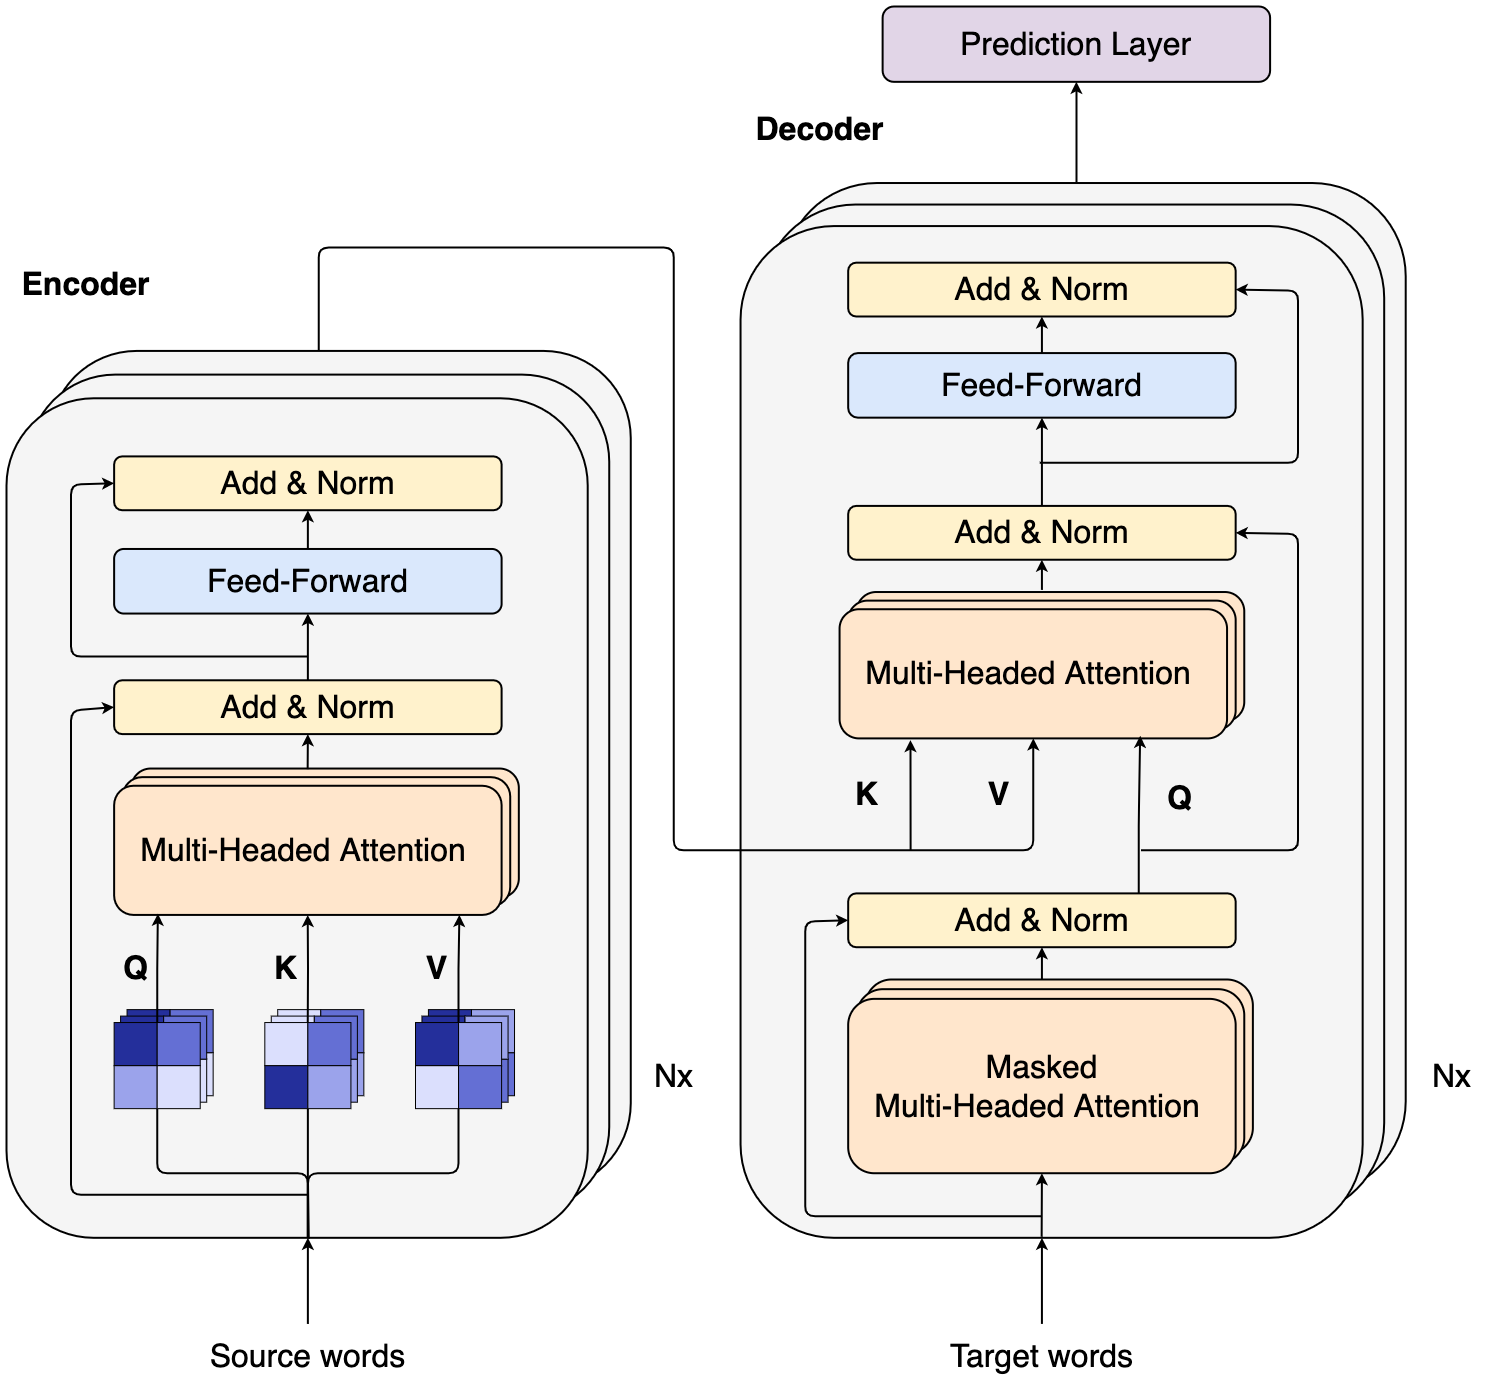

### *References*

Original paper: [Attention is All you Need](https://proceedings.neurips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)

Thorough guide on Transformer components: [Formal Definitions in Trasformers ](https://arxiv.org/pdf/2207.09238.pdf)

Practical PyTorch Transformer walkthrough: [The Annotated Transform](http://nlp.seas.harvard.edu/annotated-transformer/http://nlp.seas.harvard.edu/annotated-transformer/)

If you want to train a transformer form the strach. Follow the below links. These will guide you to develop your own model.

*   [Train your Tokenizer](https://github.com/huggingface/notebooks/blob/main/examples/tokenizer_training.ipynb)
*  [ Train your language model](https://https://github.com/huggingface/notebooks/blob/main/examples/language_modeling_from_scratch.ipynb)



---



## **Fine tunning transformer model for binary classification**

Method 01 : Using Huggingface Tutorial

In [3]:
# Insatll the dataset from the huggingface
import sys
!{sys.executable} -m pip install -U evaluate datasets huggingface_hub fsspec transformers datasets accelerate 

  Using cached evaluate-0.4.5-py3-none-any.whl.metadata (9.5 kB)
  Using cached datasets-4.0.0-py3-none-any.whl.metadata (19 kB)
  Using cached huggingface_hub-0.34.4-py3-none-any.whl.metadata (14 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached dill-0.4.0-py3-none-any.whl.metadata (10 kB)
  Using cached pandas-2.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (91 kB)
  Using cached xxhash-3.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached multiprocess-0.70.18-py312-none-any.whl.metadata (7.5 kB)
  Using cached pyarrow-21.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached dill-0.3.8-py3-none-any.whl.metadata (10 kB)
  Using cached multiprocess-0.70.16-py312-none-any.whl.metadata (7.2 kB)
  Using cached fsspec-2025.3.0-py3-none-any.whl.metadata (11 kB)
  Using cached aiohttp-3.12.15-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.7 kB)
 

In [2]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 113.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]
Note: you may need to restart the kernel to use updated packages.


In [1]:
import accelerate
import transformers
from datasets import load_dataset
from transformers import AutoTokenizer
from transformers import DataCollatorWithPadding
import evaluate
import numpy as np
from transformers import pipeline
from sklearn.metrics import precision_recall_fscore_support as score

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [2]:
# Load dataset from the hugging face
imdb = load_dataset("stanfordnlp/imdb")

README.md: 0.00B [00:00, ?B/s]

plain_text/train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

plain_text/test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

plain_text/unsupervised-00000-of-00001.p(…):   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [3]:
imdb["test"][0]

{'text': 'I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood. I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original). Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn\'t match the background, and painfully one-dimensional characters cannot be overcome with a \'sci-fi\' setting. (I\'m sure there are those of you out there who think Babylon 5 is good sci-fi TV. It\'s not. It\'s clichéd and uninspiring.) While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek). It may treat important issues, yet not as a serious philosophy. It\'s really difficult to care about the characters here as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch. The makers of Earth KNOW it\'s rubbish as 

In [4]:
# #The magic one-liner: Download, load, and prepare the correct tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
# Import Preprocessor
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

In [6]:
tokenized_imdb = imdb.map(preprocess_function, batched=True)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [7]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [8]:
accuracy = evaluate.load("accuracy")

In [9]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [10]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [11]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer


In [12]:
model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [13]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

trainer.save_model()

/tmp/ipykernel_2289/2987002845.py:14: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [14]:
test_text = imdb["test"].remove_columns('label')
tokenized_sample_test = test_text.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_sample_test)

print(predictions)

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

PredictionOutput(predictions=array([[ 2.5431492 , -2.1197345 ],
       [ 1.3384503 , -0.7917117 ],
       [ 2.1791856 , -1.6512085 ],
       ...,
       [ 0.04172844,  0.54324687],
       [-0.22730559,  0.6919511 ],
       [-1.1584756 ,  1.6803969 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 41.1196, 'test_samples_per_second': 607.982, 'test_steps_per_second': 19.018})


In [15]:
pred_ids = np.argmax(predictions.predictions, axis=1)
pred_labels = [id2label[i] for i in pred_ids]
print(pred_labels)

['NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'NE

### Train with Wandb

This is for your reference only. But you can't run the wand db in the server we provided. But you are able to do in google colab.

In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=1,
    weight_decay=0.01,
    eval_strategy="steps",
    eval_steps=20,
    save_strategy="steps",
    load_best_model_at_end=True,
    report_to="wandb"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_imdb["train"],
    eval_dataset=tokenized_imdb["test"],
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

trainer.save_model()

/tmp/ipython-input-953656552.py:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
test_text = imdb["test"].remove_columns('label')
tokenized_sample_test = test_text.map(preprocess_function, batched=True)

predictions = trainer.predict(tokenized_sample_test)

print(predictions)

pred_ids = np.argmax(predictions.predictions, axis=1)
pred_labels = [id2label[i] for i in pred_ids]
print(pred_labels)

# Multi class classification

**Task to attempt !!!**




Write a code to multiclass classification for given dataset either using the above method

> The AG's news topic classification dataset is constructed by choosing 4 largest classes

> The class ids are numbered 1-4 where 1 represents World, 2 represents Sports, 3 represents Business and 4 represents Sci/Tech.

Link: [Data Description](https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset)

In [ ]:
#Your code goes here